<a href="https://colab.research.google.com/github/ThaysMolina/PROJETO-1-/blob/main/PROJETO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho teve o intuito de entender alguns motivos do cancelamento de reserva de hotel. Com isso o hotel pode-se precaver para não haver tantos cancelamentos.
Para o estudo eu usei algumas variáveis do dataframe:
* days_in_waiting_list - Discreta
* arrival_date_month - Nominal
* is_canceled - Nominal
* Country - Nominal
* market_segment - Nominal
* is_repeated_guest - Nominal
Os dados foram tirados do site Kaggle






In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


**Carregando Base de Dados**

In [ ]:
# Informa a URL de importação do dataset (URL Raw)
url = "https://raw.githubusercontent.com/ThaysMolina/PROJETO-1-/main/hotel_bookings.csv"

# Lê o arquivo
dados_hotel = pd.read_csv(url, sep=',')


## *Análise Exploratória *

Informações Gerais e Estatísticas Descritivas


In [ ]:
# Mostra as dimensões do dataset
dados_hotel.shape

(119390, 31)

O dataset tem 119390 linhas e 31 colunas, isto é 31 variáveis.

In [ ]:
# Mostra as informações do dataset
dados_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

  Podemos ver acima que nas informações do dataset, algumas variáveis em algumas linhas não tem valores,dados faltantes (NA's), por exemplo as variáveis : children (crianças), Country (País), Agente e Company (Empresa). Ou seja, os clientes não preencheram os dados na reserva.
  Para a variável criança os dados faltantes (NA's) corresponde a 0,0034% do dataset.
  Para a variável país, corresponde a 0,4%. Para Agente seria 14% e Empresa seria 94%. As variáveis Agente e Empresa corresponde ao código do agente e da empresa, que para a análise nao entra em questão. Dado essas informações, eu escolho excluir as linhas com os dados faltantes. Primeiro irei excluir as colunas que não vou precisar para a análise, no caso Agente e Empresa e depois as linhas faltantes das outras variáveis citadas.

In [ ]:
colunas_para_excluir = ['agent','company']
dados_hotel_novo = dados_hotel.drop(colunas_para_excluir, axis=1)

# Exibir o DataFrame sem a coluna 'Coluna2'
print("\nDataFrame sem a Coluna2:")
print(dados_hotel_novo)


DataFrame sem a Coluna2:
               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2   

e agora vamos excluir as linhas faltantes. Se tivesse excluído todas as linhas faltantes sem excluir as colunas, ou fizesse primeiro excluir as linhas e depois as colunas, iria perder muitos dados.

In [ ]:
dados_hotel_novo2 = dados_hotel_novo.dropna()
print("\nDataFrame sem Linhas Faltantes:")
print(dados_hotel_novo2)


DataFrame sem Linhas Faltantes:
               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27 

In [ ]:
#Nova dimensão do dataset

dados_hotel_novo2.shape

(118898, 29)

Atualmente a base tem 118.898 linhas e 29 colunas. Temos 99,59% da base original.


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dados_hotel_novo2.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,0,Transient,98.0,0,1,Check-Out,3/07/15
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,0,Transient,98.0,0,1,Check-Out,3/07/15
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,C,0,0,Transient,107.0,0,0,Check-Out,3/07/15
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,C,0,0,Transient,103.0,0,1,Check-Out,3/07/15
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,A,0,0,Transient,82.0,0,1,Canceled,6/05/15
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,D,0,0,Transient,105.5,0,0,Canceled,22/04/15


Para a nossa primeira hipótese : Reservas com tempos de espera mais longos têm uma probabilidade maior de serem canceladas devido à frustração do cliente.
Vamos utilizar as variáveis tempo de espera e reserva cancelada.

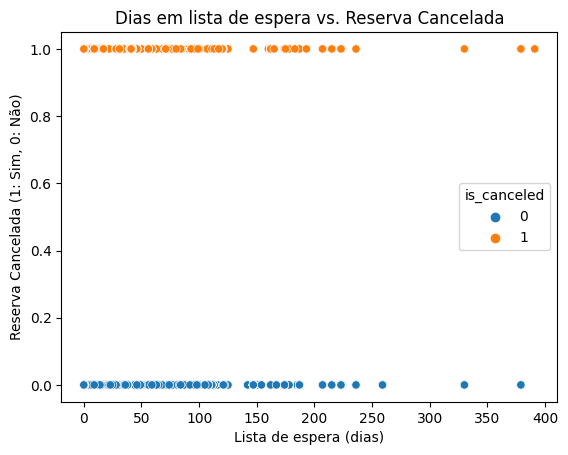

Correlação: 0.054015665927014664


In [ ]:
# Visualize os dados
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=dados_hotel_novo2, hue='is_canceled')
plt.title('Dias em lista de espera vs. Reserva Cancelada')
plt.xlabel('Lista de espera (dias)')
plt.ylabel('Reserva Cancelada (1: Sim, 0: Não)')
plt.show()

# Calcule a correlação entre tempo de espera e cancelamento da reserva
correlation = dados_hotel_novo2['days_in_waiting_list'].corr(dados_hotel_novo2['is_canceled'])
print(f'Correlação: {correlation}')



Pode-se ver no gráfico e no resultado da correlação que as duas variáveis não variam de maneira consistente uma com a outra. Abaixo realizei uma estatística descritiva para ter insights adicionais sobre a distribuição dos tempos de espera em ambos os casos. E podemos ver que em média o tempo de espera (dias) para ser cancelado ou não, de fato nao interfere.

In [ ]:
# Compare estatísticas descritivas para reservas canceladas e não canceladas
stats_cancelada = dados_hotel_novo2[dados_hotel_novo2['is_canceled'] == 1]['days_in_waiting_list'].describe()
stats_nao_cancelada = dados_hotel_novo2[dados_hotel_novo2['is_canceled'] == 0]['days_in_waiting_list'].describe()

print('\nEstatísticas para reservas canceladas:')
print(stats_cancelada)

print('\nEstatísticas para reservas não canceladas:')
print(stats_nao_cancelada)




Estatísticas para reservas canceladas:
count    44153.000000
mean         3.569814
std         21.505563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

Estatísticas para reservas não canceladas:
count    74745.000000
mean         1.598823
std         14.825972
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        379.000000
Name: days_in_waiting_list, dtype: float64


A segunda hipótese que testarei é : Hipótese: Reservas em determinados meses têm maior probabilidade de serem canceladas.
Irei calcular a taxa de cancelamento global para todas as reservas e farei o teste estatístico qui- quadrado para comparar as proporções de cancelamento entre os meses.

In [ ]:
# Análise Descritiva
total_cancelado = dados_hotel_novo2['is_canceled'].sum()
total_reservas = len(dados_hotel_novo2)

taxa_cancelamento_global = total_cancelado / total_reservas
print(f'Taxa de cancelamento global: {taxa_cancelamento_global:.2%}')

# Tabela de contingência
contingency_table = pd.crosstab(dados_hotel_novo2['arrival_date_month'],dados_hotel_novo2['is_canceled'])

# Teste Qui-Quadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Qui-Quadrado: {chi2}')
print(f'Valor p: {p}')

# Interpretação do teste
if p < 0.05:
    print('A diferença nas taxas de cancelamento entre os meses é estatisticamente significativa.')
else:
    print('Não há evidência estatística de diferença nas taxas de cancelamento entre os meses.')

Taxa de cancelamento global: 37.14%
Qui-Quadrado: 562.0842901398939
Valor p: 1.788738008658553e-113
A diferença nas taxas de cancelamento entre os meses é estatisticamente significativa.


In [ ]:
# Calculando as taxas de cancelamento para cada mês
contingency_table['Taxa_Cancelamento'] = contingency_table[1] / (contingency_table[0] + contingency_table[1])

# Ordenando os meses pela taxa de cancelamento
sorted_months = contingency_table.sort_values(by='Taxa_Cancelamento', ascending=False)

# Exibindo o mês com a maior taxa de cancelamento
mes_maior_cancelamento = sorted_months.index[0]
taxa_maior_cancelamento = sorted_months['Taxa_Cancelamento'].iloc[0]

print(f'O mês com a maior taxa de cancelamento é {mes_maior_cancelamento} com uma taxa de {taxa_maior_cancelamento:.2%}')

O mês com a maior taxa de cancelamento é June com uma taxa de 41.49%


A próxima hipótese para o motivo do cancelamento na reserva de hotel, seria saber se as reservas de determinados países podem ter taxas de cancelamento mais altas devido a fatores como restrições de viagem, sazonalidade, etc.


Aproveitei e criei uma coluna no Dataframe com a variável : Taxa_Cancelamento

In [ ]:
# Calcular a taxa de cancelamento
total_cancelado = dados_hotel_novo2['is_canceled'].sum()
total_reservas = len(dados_hotel_novo2)
dados_hotel_novo2['Taxa_Cancelamento'] = (total_cancelado / total_reservas) * 100
#print(dados_hotel_novo2)

# Analisando a taxa de cancelamento média por país
media_por_pais = dados_hotel_novo2.groupby('country')['Taxa_Cancelamento'].mean().reset_index()
media_por_pais
 #Um teste estatístico comum para comparar médias entre dois ou mais grupos é a Análise de Variância (ANOVA).
# Ajustar um modelo ANOVA
modelo = ols('Taxa_Cancelamento ~ country', data=dados_hotel_novo2).fit()

# Realizar a ANOVA
anova_tabela = sm.stats.anova_lm(modelo, typ=2)
print(anova_tabela)



                sum_sq        df           F  PR(>F)
country   1.464572e-21     176.0  307.648793     0.0
Residual  3.211222e-21  118721.0         NaN     NaN


O valor F é relativamente grande (307.648793), indicando que há uma variação significativa entre os grupos.
O valor p é menor que 0.05, sugerindo que há evidências suficientes para rejeitar a hipótese nula de que as médias são iguais.Há diferenças significativas nas taxas de cancelamento entre os países. Tive a curiosidade de rankear e saber os países que mais cancelam até os país que menos cancela.

In [ ]:
# Certifique-se de remover duplicatas antes de calcular a taxa de cancelamento
dados_hotel_novo2 = dados_hotel_novo2.drop_duplicates()

# Calcular a taxa de cancelamento para cada país
dados_hotel_novo2['Taxa_Cancelamento'] = (dados_hotel_novo2.groupby('country')['is_canceled'].transform('sum') / dados_hotel_novo2.groupby('country')['is_canceled'].transform('count')).fillna(0) * 100

# Arredondar os valores para tornar a saída mais legível
dados_hotel_novo2['Taxa_Cancelamento'] = dados_hotel_novo2['Taxa_Cancelamento'].round(2)

# Remover linhas que contenham valores NaN
dados_hotel_novo2 = dados_hotel_novo2.dropna(subset=['Taxa_Cancelamento'])

# Ordenar o DataFrame pelo ranking da taxa de cancelamento em ordem decrescente
dados_hotel_novo2_ranking = dados_hotel_novo2.sort_values(by='Taxa_Cancelamento', ascending=False)

# Adicionar uma coluna com o ranking
dados_hotel_novo2_ranking['Ranking'] = range(1, len(dados_hotel_novo2_ranking) + 1)

# Visualizar o DataFrame classificado
print(dados_hotel_novo2_ranking[['country', 'Taxa_Cancelamento', 'Ranking']])

       country  Taxa_Cancelamento  Ranking
66083      IMN              100.0        1
67921      BEN              100.0        2
7980       JEY              100.0        3
54636      BEN              100.0        4
68177      BEN              100.0        5
...        ...                ...      ...
100496     CMR                0.0    86905
115855     CMR                0.0    86906
84628      PAN                0.0    86907
84851      LBY                0.0    86908
106962     CUB                0.0    86909

[86909 rows x 3 columns]


Ilha de Man, Benin e Jersey seriam as cidades com mais chance de cancelamento.

Outra analise seria saber se diferentes segmentos de mercado (negócios, lazer, eventos, etc.) têm diferentes padrões de cancelamento.


                  count      mean       std  min  25%  50%  75%  max
market_segment                                                      
Aviation          227.0  0.198238  0.399553  0.0  0.0  0.0  0.0  1.0
Complementary     698.0  0.123209  0.328913  0.0  0.0  0.0  0.0  1.0
Corporate        4025.0  0.123478  0.329026  0.0  0.0  0.0  0.0  1.0
Direct          11644.0  0.147887  0.355004  0.0  0.0  0.0  0.0  1.0
Groups           4936.0  0.270462  0.444243  0.0  0.0  0.0  1.0  1.0
Offline TA/TO   13846.0  0.148129  0.355241  0.0  0.0  0.0  0.0  1.0
Online TA       51533.0  0.353987  0.478210  0.0  0.0  0.0  1.0  1.0


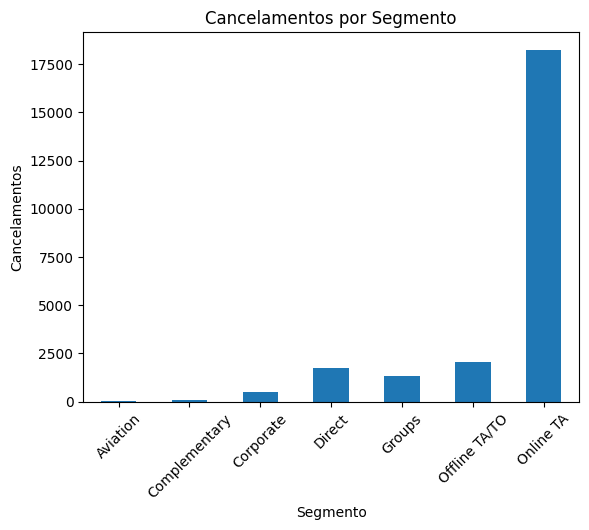

In [ ]:
# estatísticas resumidas
resumo = dados_hotel_novo2.groupby('market_segment')['is_canceled'].describe()

# Imprima as estatísticas resumidas
print(resumo)

# Plote um gráfico de barras para visualizar os cancelamentos por segmento
dados_hotel_novo2.groupby('market_segment')['is_canceled'].sum().plot(kind='bar', rot=45, xlabel='Segmento', ylabel='Cancelamentos', title='Cancelamentos por Segmento')
plt.show()

Quando a resrva é Online TA temos uma maior chance de cancelar a reserva. Talvez por ter a facilidade de cancelar a qualquer hora e não somente em horário de expediente do setor responsável.

Outra hipótese a se testar era se os clientes frequentes têm menor probabilidade de cancelar reservas em comparação com novos clientes.


In [ ]:

data = {
    'is_repeated_guest': dados_hotel_novo2['is_repeated_guest'].tolist(),
    'booking_canceled': dados_hotel_novo2['is_canceled'].tolist()
}

dados= pd.DataFrame(data)

# Tabela de contingência
contingency_table = pd.crosstab(dados_hotel_novo2['is_repeated_guest'], dados_hotel_novo2['is_canceled'])

# Teste qui-quadrado de independência
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Imprimir resultados
print(f'Estatística de teste qui-quadrado: {chi2}')
print(f'Valor p: {p_value}')

# Comparar o valor p com um nível de significância, por exemplo, 0.05
if p_value < 0.05:
    print('A diferença nas taxas de cancelamento é estatisticamente significativa.')
else:
    print('Não há evidências suficientes para rejeitar a hipótese nula.')
# Calcular proporções de cancelamento em cada grupo
total_frequent = contingency_table.loc[1].sum()
total_non_frequent = contingency_table.loc[0].sum()

prop_cancel_frequent = contingency_table.loc[1, 1] / total_frequent
prop_cancel_non_frequent = contingency_table.loc[0, 1] / total_non_frequent

# Imprimir resultados
print(f'Proporção de cancelamento para hóspedes frequentes: {prop_cancel_frequent:.2%}')
print(f'Proporção de cancelamento para não frequentes: {prop_cancel_non_frequent:.2%}')

Estatística de teste qui-quadrado: 861.663820464543
Valor p: 2.1176165683492342e-189
A diferença nas taxas de cancelamento é estatisticamente significativa.
Proporção de cancelamento para hóspedes frequentes: 14.50%
Proporção de cancelamento para não frequentes: 37.88%
